In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Чтение данных из CSV файла
df = pd.read_csv("all_vacancies.csv")

In [102]:
df.head()

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день


<Axes: >

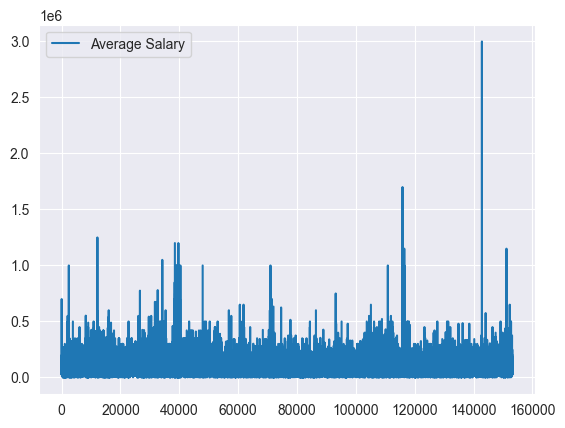

In [103]:
df.plot()

In [104]:
df[df['Average Salary'] > 250000]

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule
12,Йошкар-Ола,Директор производства,Более 6 лет,700000.0,Начальник производства,Полный день
345,Йошкар-Ола,Java Dev (fintech),От 3 до 6 лет,265000.0,"Программист, разработчик",Полный день
565,Йошкар-Ола,Тракторист (Кировец),От 1 года до 3 лет,270000.0,Машинист,Вахтовый метод
1065,Йошкар-Ола,Агент по продажам автомобилей,От 1 года до 3 лет,275000.0,"Менеджер по продажам, менеджер по работе с кли...",Гибкий график
1067,Йошкар-Ола,Тракторист (Кировец),От 1 года до 3 лет,300000.0,Машинист,Вахтовый метод
...,...,...,...,...,...,...
152603,Ростов-на-Дону,Сварщик РД НАКС вахтой в Краснодарском крае,От 3 до 6 лет,273000.0,Сварщик,Вахтовый метод
152706,Ростов-на-Дону,Менеджер по продажам жилой недвижимости,От 3 до 6 лет,500000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день
152772,Ростов-на-Дону,Менеджер по продажам коммерческой недвижимости...,От 1 года до 3 лет,325000.0,Агент по недвижимости,Полный день
152933,Ростов-на-Дону,Водитель-экспедитор,От 1 года до 3 лет,275000.0,Водитель,Полный день


<Axes: >

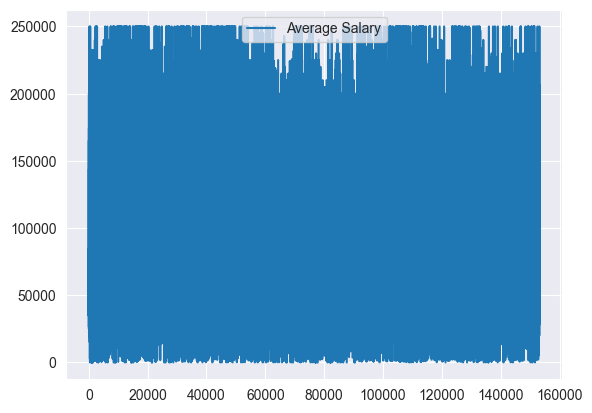

In [105]:
isx = df[(df['Average Salary'] > 250000)].index
df = df.drop(df.index[isx])
df.plot()


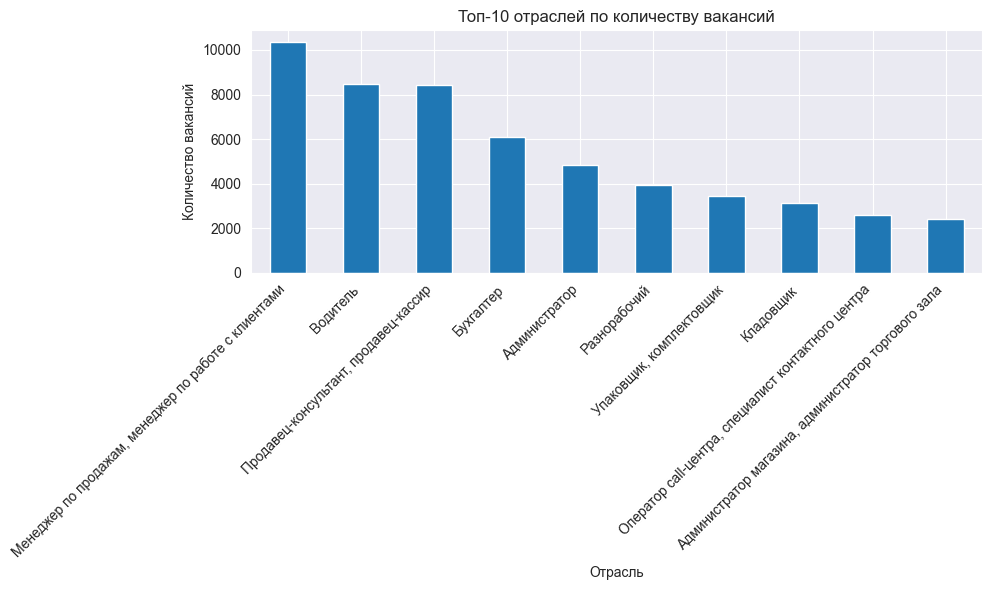

In [106]:
# Фильтрация данных, исключая отрасль "Другое"
df_filtered = df[df['Industry'] != 'Другое']

# Подсчет количества вакансий для каждой отрасли
industry_counts = df_filtered['Industry'].value_counts().head(10)

# Построение графика
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar')
plt.title('Топ-10 отраслей по количеству вакансий')
plt.xlabel('Отрасль')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



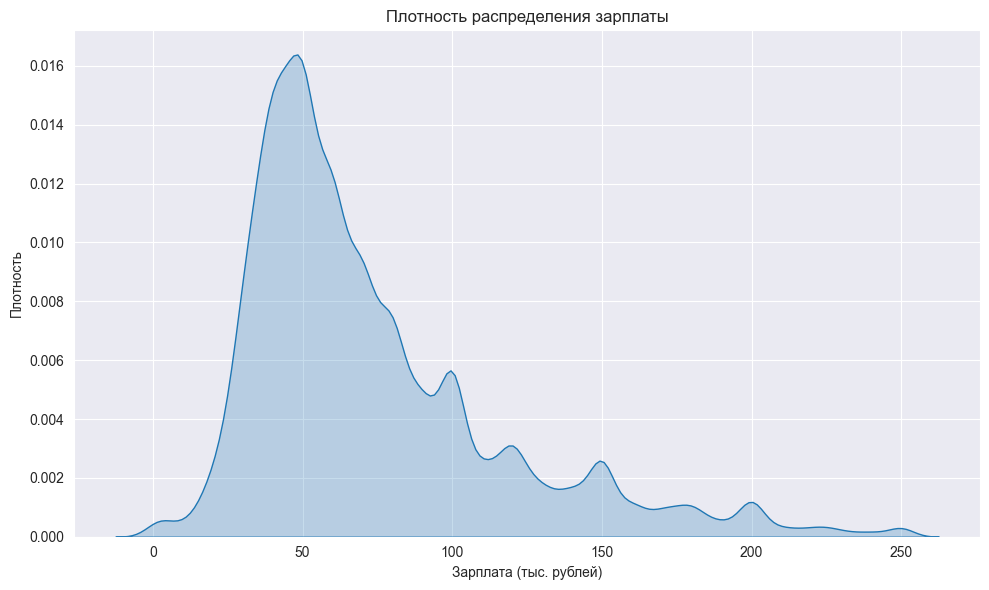

In [107]:
# Фильтрация данных, исключая вакансии без указания зарплаты
df_filtered = df_filtered.dropna(subset=['Average Salary'])

# Преобразование данных зарплаты в тысячи рублей
df_filtered['Average Salary'] /= 1000

# Построение графика плотности распределения зарплаты с помощью seaborn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_filtered['Average Salary'], fill=True)
plt.title('Плотность распределения зарплаты')
plt.xlabel('Зарплата (тыс. рублей)')
plt.ylabel('Плотность')
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# Создание словаря для соответствия текстовых значений опыта числовым
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,
    'От 3 до 6 лет': 4,
    'Более 6 лет': 7
}

# Применение кодирования категорий к столбцу с опытом работы
df['Experience'] = df['Experience Required'].map(experience_mapping)

In [109]:
df.head()

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule,Experience
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день,2
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день,4
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день,0
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день,0
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день,0


In [110]:
cities = pd.read_csv('ru-cities.csv', sep=';')
cities.columns = ['City', 'Population']
cities.head()

,City,Population
0,Москва,11514300
1,Санкт-Петербург,4848700
2,Новосибирск,1473700
3,Екатеринбург,1350100
4,Нижний Новгород,1250600


In [111]:
# Объединение вашего датафрейма с данными о населении
df = df.merge(cities, how='left', left_on='Location', right_on='City')
df.head()

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule,Experience,City,Population
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день,2,Йошкар-Ола,248700.0
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день,4,Йошкар-Ола,248700.0
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день,0,Йошкар-Ола,248700.0
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день,0,Йошкар-Ола,248700.0
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день,0,Йошкар-Ола,248700.0


In [112]:
df.head()


,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule,Experience,City,Population
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день,2,Йошкар-Ола,248700.0
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день,4,Йошкар-Ола,248700.0
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день,0,Йошкар-Ола,248700.0
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день,0,Йошкар-Ола,248700.0
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день,0,Йошкар-Ола,248700.0


In [113]:
# Создаем словарь для соответствия вариантов графика работы числовым значениям
schedule_mapping = {
    'Полный день': 1,
    'Сменный график': 2,
    'Гибкий график': 3,
    'Удаленная работа': 4,
    'Вахтовый метод': 5
}

# Применяем кодирование категорий к столбцу 'Schedule'
df['Schedule Encoded'] = df['Schedule'].map(schedule_mapping)
df.head()

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule,Experience,City,Population,Schedule Encoded
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день,2,Йошкар-Ола,248700.0,1
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день,4,Йошкар-Ола,248700.0,1
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день,0,Йошкар-Ола,248700.0,1
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день,0,Йошкар-Ола,248700.0,1
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день,0,Йошкар-Ола,248700.0,1


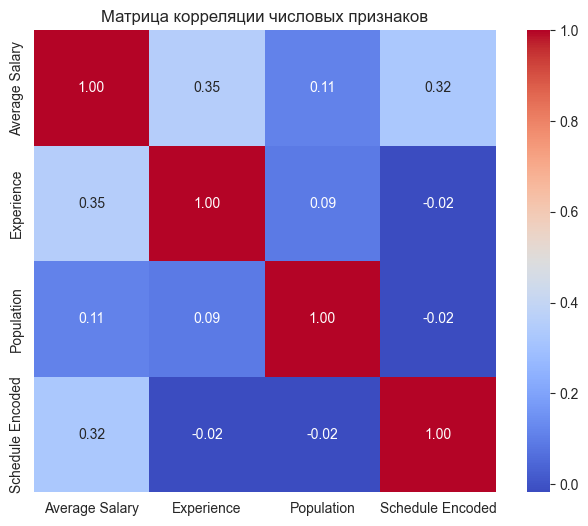

In [114]:
# Удаление строк с отсутствующими данными о зарплате
df = df.dropna(subset=['Average Salary'])
# Удаление строк с отсутствующими данными о населении
df = df.dropna(subset=['Population'])

# Выбор числовых признаков для построения матрицы корреляции
numeric_features = ['Average Salary', 'Experience', 'Population', 'Schedule Encoded']

# Построение матрицы корреляции
plt.figure(figsize=(8, 6))
correlation_matrix = df[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Матрица корреляции числовых признаков')
plt.show()

In [115]:
df.head()

,Location,Vacancy Name,Experience Required,Average Salary,Industry,Schedule,Experience,City,Population,Schedule Encoded
0,Йошкар-Ола,Менеджер по продажам (ТН Волга),От 1 года до 3 лет,165000.0,"Менеджер по продажам, менеджер по работе с кли...",Полный день,2,Йошкар-Ола,248700.0,1
1,Йошкар-Ола,Руководитель группы,От 3 до 6 лет,66000.0,Менеджер по закупкам,Полный день,4,Йошкар-Ола,248700.0,1
2,Йошкар-Ола,Начинающий специалист (до 6000 в день)-срочно,Нет опыта,102000.0,Другое,Полный день,0,Йошкар-Ола,248700.0,1
3,Йошкар-Ола,Продавец-консультант,Нет опыта,47000.0,"Продавец-консультант, продавец-кассир",Полный день,0,Йошкар-Ола,248700.0,1
4,Йошкар-Ола,Оператор технической поддержки,Нет опыта,50000.0,Специалист технической поддержки,Полный день,0,Йошкар-Ола,248700.0,1


In [116]:
df.to_csv('all_vacancies_after_processing.csv', index=False)